# Project: Investigate TMDb Movie Dataset

[Udacity Machine Learning Foundation Nanodegree Project- done by Pranali Naik]

## Table of Contents
<ul>
<li><a href="#Introduction">Introduction</a></li>
<li><a href="#Data Cleaning and Wrangling">Data Cleaning and Wrangling</a></li>
<li><a href="#Exploratory Data Analysis">Exploratory Data Analysis</a></li>
<li><a href="#Conclusion">Conclusion</a></li>
</ul>

## Introduction

In this Project, I will be investigating TMDb dataset and come up with some interesting observations.
This Project is devided into three major parts.

Data Cleaning and Wrangling - we will be preparing data for analysis through removing few rows and columns and transforming few of them into appropriate format for analysis.


Exploratory Data Analysis - In this Section, we will be going through bunch of questions as shown below and will analyse the data on that basis.

Q.1 Which movie earns the most and the least profit?

Q.2 Which was the year with highest profit?

Q.3 What kinds of properties are associated with movies that have high revenues?

                Q.3a: What is popular genre?
                
                Q.3b: Who are the popular actresses and actors?
                
                Q.3c: Who are the popular directors?
                
                Q.3d: What is average runtime of high profit making movies?
                
                Q.3e: What is average revenue of high profit making movies?
                
                Q.3f: what is average budget of high profit making movies?
             
 Q.4 What is average runtime of all the movies?
 
 
 Conclusion: This part consists of summary of all the observations.   
 

Let's start with importing libraries and creating dataframe for analysis.

In [1]:
# Import required set of Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

In [4]:
#reading the data and creating dataframe
movie_data = pd.read_csv('tmdb-movies.csv')
movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
r, c = movie_data.shape
#since 'rows' includes count of a header, we need to remove its count.
print('We have {} total entries of movies and {} columns in it.'.format(r-1, c))

We have 10865 total entries of movies and 21 columns in it.


## Data Cleaning and Wrangling

In order to do the analysis, we must be very sure that all the variables are having valid values in them also there should not be duplicates. So lets trim this data further for investigation.

1. Deleting the columns which are not required for analysis.

2. Removing duplicates

3. Replacing all '0' to 'NaN' in columns 'budget' & 'revenue' and then removing and rows with NaN values

4. Replacing all '0' to NaN in column 'runtime'

5. converting columns 'release_date', 'budget' and 'revenue' to appropriate format for analysis

##### Deleting the columns which are not required for analysis.

In [7]:
# deleting columns  from movie_data

col = ['id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count','vote_average']

movie_data = movie_data.drop(col, 1)
movie_data.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


##### Removing duplicates

In [8]:
movie_data.drop_duplicates(keep = 'first', inplace = True)
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
tagline           8041 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
release_year      10865 non-null int64
dtypes: int64(4), object(6)
memory usage: 933.7+ KB


So now we are having 10 columns and 10865 rows.
lets delete the rows with NaN values. but firstly we will replace any '0' value in column budget ans revenue with 'Nan' and we will delete the entire row wherever we are having NaN values.

##### Replacing all '0' to 'NaN' in columns 'budget' & 'revenue' and then removing rows with NaN values

In [9]:
#giving list of column names that needs to be checked
row1 = ['budget', 'revenue']

#this will replace the value of '0' to NaN of columns given in the list
movie_data[row1] = movie_data[row1].replace(0, np.NaN)

#now we will drop any row which has NaN values in any of the column of the list (check_row) 
movie_data.dropna(subset = row1, inplace = True)

r, c = movie_data.shape
print("movie_data:rows={}".format(r-1))

movie_data:rows=3853


##### Replacing all '0' to NaN in column 'runtime'  

In [10]:
#replacing 0 with NaN of runtime column of the dataframe
movie_data['runtime'] = movie_data['runtime'].replace(0, np.NaN)

##### converting columns 'release_date' to standard date format,  'budget' and 'revenue' to appropriate format for analysis

In [11]:
#converting release_date column, budget and revenue columns to appropriate format for analysis
movie_data.release_date = pd.to_datetime(movie_data['release_date'])

chng_columns = ['budget', 'revenue']
movie_data[chng_columns] = movie_data[chng_columns].applymap(np.int64)
movie_data.head()
print(movie_data.dtypes)

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object


## Exploratory Data Analysis

As mentioned above we will explore the data questionwise

### Q.1 Which movie earns the most and the least profit?

In [12]:
# lets calculate the profit for each movie
movie_data.insert(2, 'profit', movie_data['revenue'] - movie_data['budget'])
movie_data.head()

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


In [13]:
#lest define the function
def calculate(column):
    #for highest earned profit
    high= movie_data[column].idxmax()
    high_details=pd.DataFrame(movie_data.loc[high])
    
    #for lowest earned profit
    low= movie_data[column].idxmin()
    low_details=pd.DataFrame(movie_data.loc[low])
    
    #collectin data in one place
    mv_profit=pd.concat([high_details, low_details], axis=1)
    
    return mv_profit

#calling the function
calculate('profit')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


So, from the data it is clear that "Avatar" bagged highest profit wheras "The Warriors's way" is a movie with least profit.

### Q.2 Which was the year with highest profit?

In [14]:
# lets sum up all the movies of a particular year
profit_year = movie_data.groupby('release_year')['profit'].sum()
print("Year of the highest profit is:", profit_year.idxmax())

Year of the highest profit is: 2015


lets analyse the same with the graph

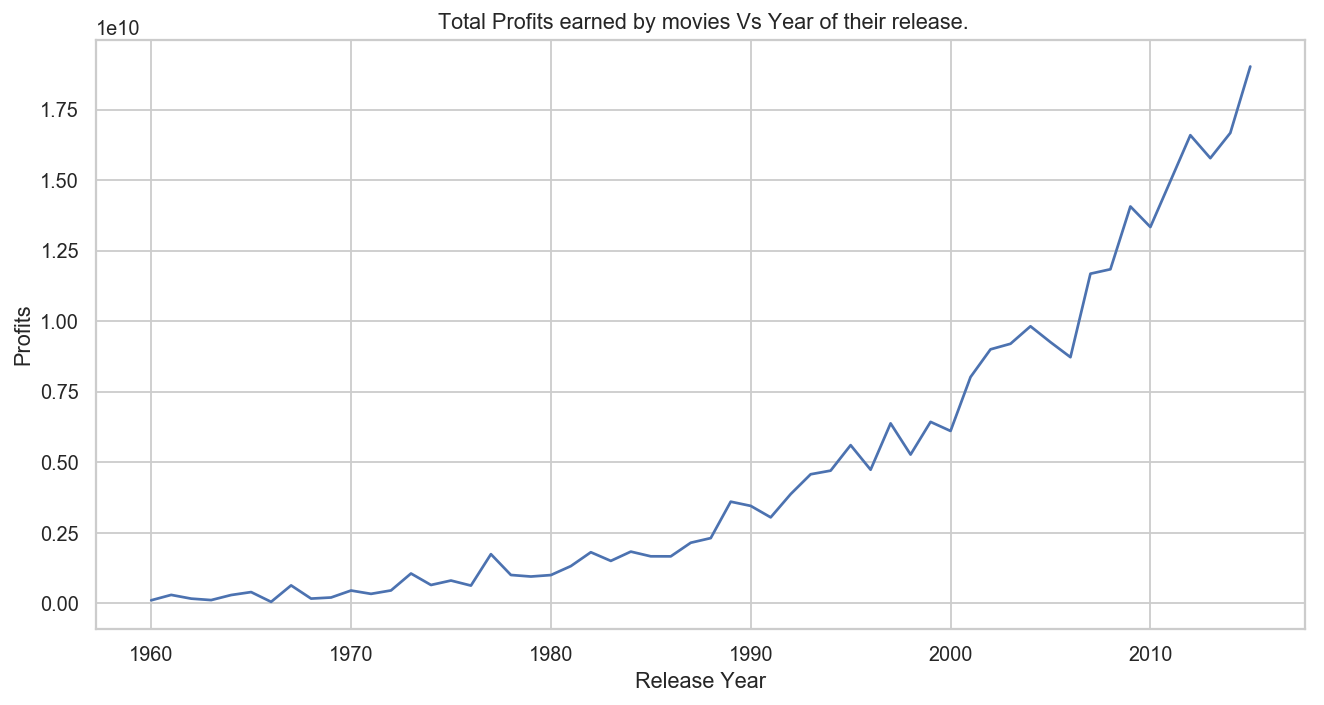

In [15]:
#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#plotting the graph
plt.plot(profit_year)

#on x-axis
plt.xlabel('Release Year', fontsize = 12)

#on y-axis
plt.ylabel('Profits', fontsize = 12)

#title of the line plot
plt.title(' Total Profits earned by movies Vs Year of their release.')

#displaying the line plot
plt.show()

From the calculations and graph we can say that year 2015 was the "year of the highest profit" !

### Q.3 What kinds of properties are associated with movies that have high revenues?

In [16]:
# We will select the movies with profit more than $50 million
profit_data = movie_data[movie_data['profit'] >= 50000000]

# lets index the new data
profit_data.index = range(len(profit_data))

# we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

# lets see updataed dataset
profit_data.head()

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
4,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
5,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


lets see the information of profit_data

In [17]:
profit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 1 to 1338
Data columns (total 11 columns):
budget            1338 non-null int64
revenue           1338 non-null int64
profit            1338 non-null int64
original_title    1338 non-null object
cast              1338 non-null object
director          1338 non-null object
tagline           1313 non-null object
runtime           1338 non-null int64
genres            1338 non-null object
release_date      1338 non-null datetime64[ns]
release_year      1338 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 115.1+ KB


There are 1338 rows in this data. Dataset reduced to 1338 records from 3853 records.

Now lets create another function which called new_data which will help to do the further insvetigation

In [18]:
def new_data(column):
    
    # we  will take a column, and separate the string by '|'
    new_data = profit_data[column].str.cat(sep = '|')
    
    # store the values seperately
    new_data = pd.Series(new_data.split('|'))
    
    # arranging in descending order
    count = new_data.value_counts(ascending = False)
    
    return count

#### Q.3a: What is popular genre?

In [19]:
popular_genres = new_data('genres')
popular_genres.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

lets see the same through plot

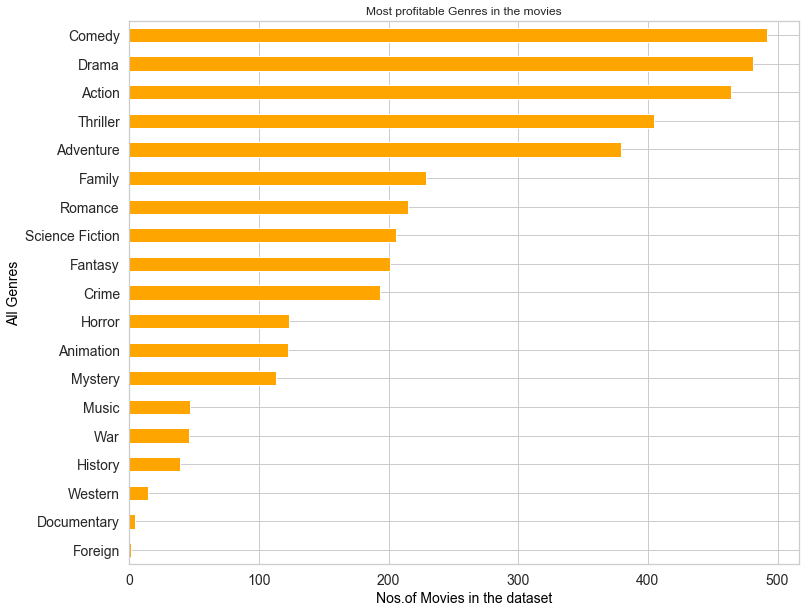

In [20]:
popular_genres.sort_values(ascending = True, inplace = True)

# ploting
lt = popular_genres.plot.barh(color = 'orange', fontsize = 14)

# title
lt.set(title = 'Most profitable Genres in the movies')

# on x axis
lt.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '14')
# on y axis
lt.set_ylabel('All Genres', color ='black', fontsize = '14')

# figure size(width, height)
lt.figure.set_size_inches(12, 10)

# ploting the graph
plt.show()

Clearly we can say that Comedy, Action and Drama are most popular genres.

#### Q.3b: Who are the popular actresses and actors?

In [21]:
popular_casts = new_data('cast')
popular_casts.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

#### Q.3c: Who are the popular directors?

In [22]:
popular_directors = new_data('director')
popular_directors.head()

Steven Spielberg    23
Robert Zemeckis     13
Clint Eastwood      12
Tim Burton          11
Tony Scott          10
dtype: int64

#### Q.3d: What is average runtime of high profit making movies?

In [23]:
profit_data['runtime'].mean()

113.66741405082212

#### Q.3e what is average revenue of these high profit making movies?

In [24]:
profit_data['revenue'].mean()

254957662.59491777

#### Q.3f: What is average budget of high profit making movies?

In [25]:
profit_data['budget'].mean()

60444957.76083707

From the above calculations, we can say that Popular director, casts and genre have really impact on the success of movies.
It seems  that Comedy, Drama and Thrillar are the most profitable genres. Also, if there are directors like Steven Spielberg , Robert Zemeckis and cast like Tom Cruise, Cameron Diaz then chances of movie to become Blockbuster or Superhit are more !!

### Q.4 What is average runtime of all the movies?

In [26]:
runtime_mean = movie_data['runtime'].mean()
print ("mean runtime of movies =",runtime_mean,'minutes')

mean runtime of movies = 109.22029060716139 minutes


Lets analyse the same from graphs

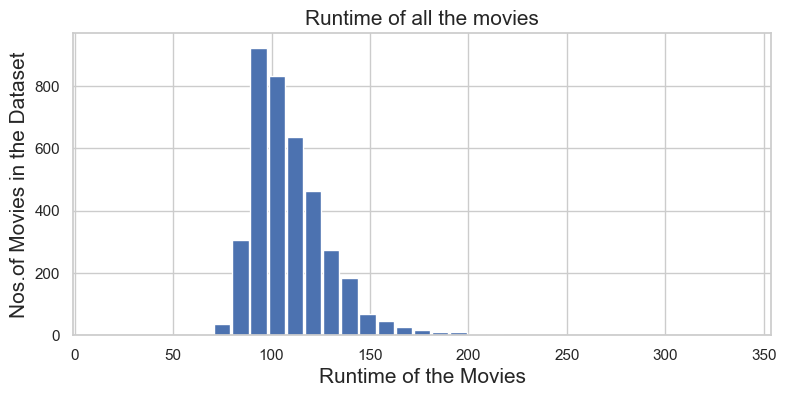

In [27]:
# giving the figure size(width, height)
plt.figure(figsize=(9,4), dpi = 100)

# x-axis labels
plt.xlabel('Runtime of the Movies', fontsize = 15)

# y-axis labels
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)

# Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

# histogram plot
plt.hist(movie_data['runtime'], rwidth = 0.9, bins =35)

# displays the plot
plt.show()

mean runtime of movies = 109.22029060716139 minutes.

Most of the movies are timed between 80 to 115 minutes. Almost 1000 movies fall in this criteria.

Lets analyse more about runtime of the movies, using a Box Plot

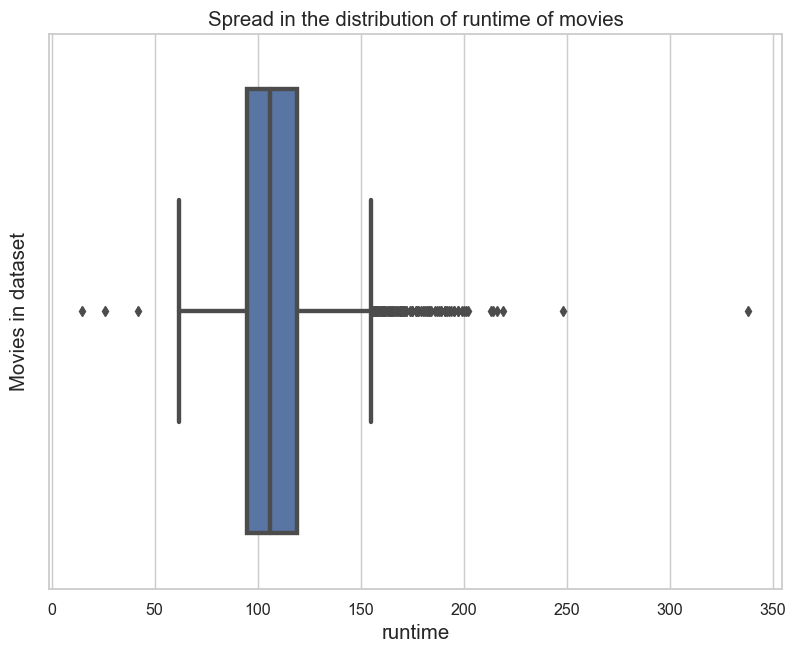

In [30]:
# Box plot of the runtime of the movies 
plt.figure(figsize=(9,7), dpi = 105)

# Using seaborn to generate the single horizontal boxplot for runtime
sns.set(context='notebook', style='whitegrid')
sns.utils.axlabel(xlabel="runtime", ylabel="Movies in dataset", fontsize=14)
sns.boxplot(x= movie_data['runtime'], linewidth = 3)
plt.title('Spread in the distribution of runtime of movies', fontsize=14)
# Diplay the plot
plt.show()

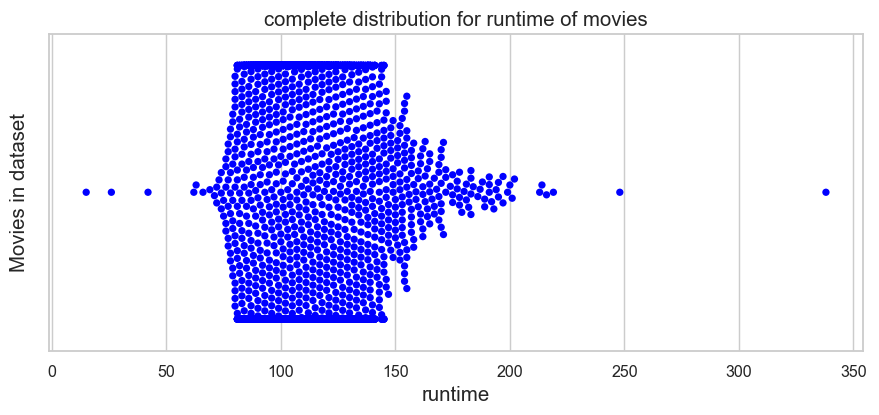

In [31]:
plt.figure(figsize=(10,4), dpi = 105)

# using seaborn to generate the single horizontal swarm plot
sns.utils.axlabel(xlabel="runtime", ylabel="Movies in dataset", fontsize=14)
sns.swarmplot(movie_data['runtime'], color = 'blue')
plt.title('complete distribution for runtime of movies', fontsize=14)
# displaying the plot
plt.show()

From above visualisation we can see complete distribution for runtime of movies.
Let's compute some statistics data for the same.

In [85]:
movie_data['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

From our statistical data Summary we can say that:

25% of movies have runtime less than 95 minutes 
50% of movies have runtime less than 109 minutes. (i.e median) 
75% of movies have runtime less than 119 minutes

## Conclusion

##### Findings and Observations:

we can say that Genre, Casts & Directors have major impact on the Success of movie.
With below details, chances of making highest profitable movies are more:

Popular genres: Comedy , Drama, Action & Thriller

Popular casts:Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone, Cameron Diaz

Popular directors:Steven Spielberg, Robert Zemeckis, Clint Eastwood, Tim Burton, Tony Scott

##### Limitations

This might not be completely error free but by following these suggestion one can increase the probability of a movie to become a hit. Moreover we are not sure if the data provided to us is completely correct and up-to-date.

Dropping the rows with missing values also affected the overall analysis.

And budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. This also affects the analysis.